In [1]:
import os
import numpy as np
from matplotlib import image
import matplotlib.pyplot as plt

os.chdir('../')
DATA_PATH = os.path.join(os.getcwd(), 'data', 'train')
print(DATA_PATH)
os.chdir('./individual_solns')

c:\Users\menno\Desktop\Code\Python\IDL-A1\data\train


In [7]:
def gen_data(folder, final_img_size: int, imgs_per_subtype: int = 100, max_subtypes_per_type: int = 5):
    """Generate new folder with training data in npy form"""

    n = 256//final_img_size
    # find all paths that will be used for the final selection
    paths = {}
    for subdir in os.listdir(folder):
        if len(subdir.lower().split('.'))>1: # detected file with extension  
            continue
        name = subdir.split("___")[0]
        paths[name] = paths.get(name, [])
        if len(paths[name]) <= max_subtypes_per_type:
            paths[name].append(os.path.join(folder, subdir))

    IMGS = []
    LABELS = []
    # get all the images 
    for name, paths in paths.items():
        for path in paths:
            files = list(filter(lambda file: file.lower().endswith(".jpg"), os.listdir(path)))
            for file in files[: imgs_per_subtype]:
                # load img, rescale to (256/n, 256/n, 3), n=final_img_size
                img = image.imread(os.path.join(path, file))[::n, ::n]
                # scale to [0, 1] range
                IMGS.append(img/255)
                LABELS.append(path.split('\\')[-1])

    IMGS = np.array(IMGS)
    LABELS = np.array(LABELS)
    print(IMGS.shape, LABELS.shape) # print shapes to check the data
    np.save(os.path.join(folder, f'images'), IMGS)
    np.save(os.path.join(folder, f'labels'), LABELS)

            
gen_data(DATA_PATH, final_img_size=32, imgs_per_subtype=300)

(10200, 32, 32, 3) (10200,)


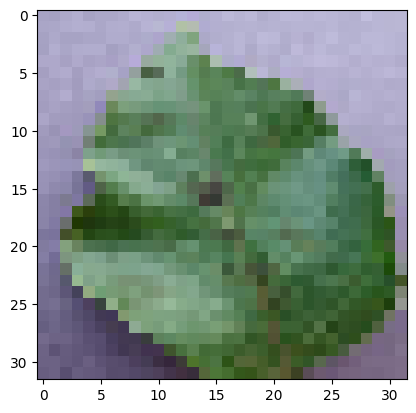

In [2]:
IMG_PATH = os.path.join(DATA_PATH, 'images.npy')
LABEL_PATH = os.path.join(DATA_PATH, 'labels.npy')

X = np.load(IMG_PATH)
y = np.load(LABEL_PATH)

plt.imshow(X[0])